## Capital Gains Tracker
### AD325 Project 1

<img> UML diagram

In [6]:
from stock_ledger import StockLedger
from trading_bot import *
from capital_gains_helper_methods import *
import matplotlib.pyplot as plt
import copy
from stock_sale import StockSale
from stock_purchase import StockPurchase
colors = ['g', 'y', 'b', 'r']

### sellOptimal

"When the sale price is greater than the ledger entry average, make as much money as possible.", "When the sale price is less than the ledger entry average, lose as little money as possible."; both statements are effected by filling sale quantities using the lowest priced stock purchases available.

These behaviors are effected over controlled traversal of ledger entries (deques), using pointers, and gathering statistics.

### Comparing sell (queue-behavior), sellRandom (pseudorandom deque-behavior), and sellOptimal (deque-behavior):

Over a number of input strings encoding buy and sell orders (such that no sell order is greater than current number of shares).

Compare profit over each buy/sell for a single input string:

Compare average profit per share per sale.

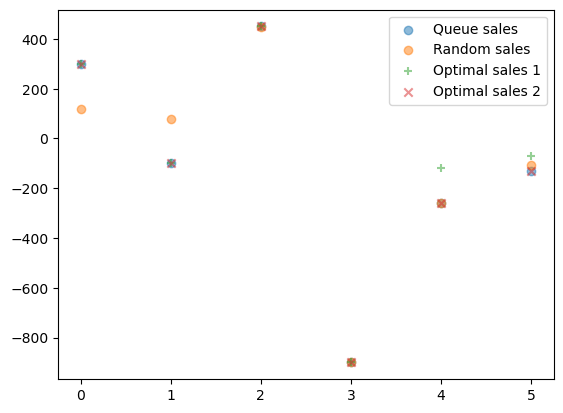

In [7]:
tb_1 = TradingBot(10000)
tb_random = copy.deepcopy(tb_1)
tb_optimal_1 = copy.deepcopy(tb_1)
tb_optimal_2 = copy.deepcopy(tb_1)
buy_sell_str = """Buy 20 shares of AAPL at $45.
Buy 20 shares of AAPL at $75.
Buy 20 shares of MSFT at $95.
Display the ledger
Sell 30 shares of AAPL at $65
Display the ledger
Sell 10 shares of AAPL at $65
Display the ledger
Buy 100 shares of AAPL at $20
Buy 20 shares of AAPL at $24
Buy 200 shares of TSLA at $36
Display the ledger
Sell 10 shares of AAPL at $65
Display the ledger
Sell 150 shares of TSLA at $30
Display the ledger
Buy 5 shares of MSFT at $60
Buy 5 shares of MSFT at $70
Display the ledger
Sell 4 shares of MSFT at $30
Display the ledger
Sell 2 shares of MSFT at $30
Display the ledger"""
string_to_trading_bot(buy_sell_str, tb_1)
string_to_trading_bot(buy_sell_str, tb_random, 2)
string_to_trading_bot(buy_sell_str, tb_optimal_1, 3)
string_to_trading_bot(buy_sell_str, tb_optimal_2, 4)
plot_x = [x_i for x_i in range(len(tb_1.profit_per_sell))]
plt.figure()
plt.scatter(plot_x, tb_1.profit_per_sell, label='Queue sales', alpha=0.5)
plt.scatter(plot_x, tb_random.profit_per_sell, label='Random sales', alpha=0.5)
plt.scatter(plot_x, tb_optimal_1.profit_per_sell, label='Optimal sales 1', alpha=0.5, marker='+')
plt.scatter(plot_x, tb_optimal_2.profit_per_sell, label='Optimal sales 2', alpha=0.5, marker='x')
plt.legend()
plt.show()

In [8]:
print(tb_1)
tb_1.stock_ledger.display_total_shares()
print(tb_random)
tb_random.stock_ledger.display_total_shares()
print(tb_optimal_1)
tb_optimal_1.stock_ledger.display_total_shares()
print(tb_optimal_2)
tb_optimal_2.stock_ledger.display_total_shares()
print()
# print most recent sale:
# print(tb_optimal_1.stock_sales_list[0])
# print()
# print(tb_optimal_2.stock_sales_list[0])
# print()
# print(tb_optimal_1.stock_sales_list[-1].shares)
# print()
# print(tb_optimal_2.stock_sales_list[-1].shares)

Total shares:
AAPL: 110 shares
MSFT: 24 shares
TSLA: 50 shares
Total shares:
AAPL: 110 shares
MSFT: 24 shares
TSLA: 50 shares
Total shares:
AAPL: 110 shares
MSFT: 24 shares
TSLA: 50 shares
Total shares:
AAPL: 110 shares
MSFT: 24 shares
TSLA: 50 shares



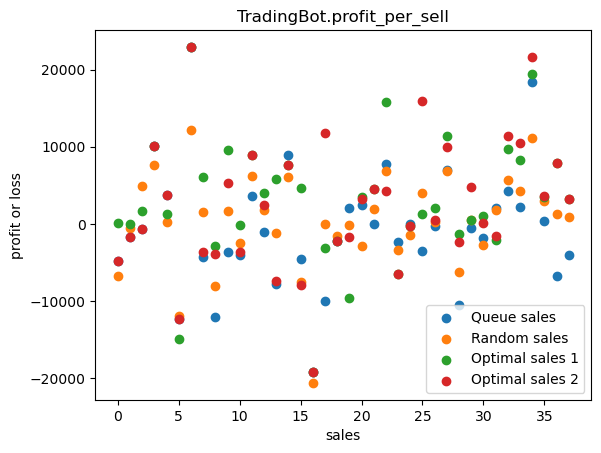

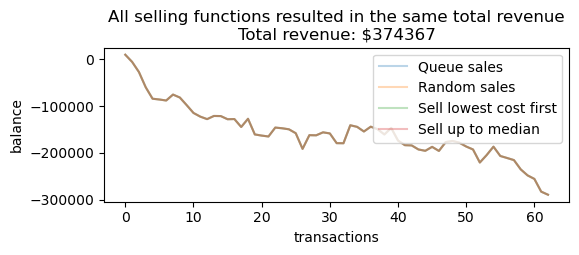

In [9]:
import numpy as np
testing_buy_sell_string = generate_buy_sell_lines_string(['AAPL', 'MSFT', 'TSLA', 'NVDA'], 100, 20, 200)[0]
testing_bot_sell = TradingBot(10000)
testing_bot_random = TradingBot(10000)
testing_bot_optimal_1 = TradingBot(10000)
testing_bot_optimal_2 = TradingBot(10000)
bots = [testing_bot_sell, testing_bot_random, testing_bot_optimal_1, testing_bot_optimal_2]
# interpret string as buy and sell, for each selling behavior
string_to_trading_bot(testing_buy_sell_string, testing_bot_sell)
string_to_trading_bot(testing_buy_sell_string, testing_bot_random, 2)
string_to_trading_bot(testing_buy_sell_string, testing_bot_optimal_1, 3)
string_to_trading_bot(testing_buy_sell_string, testing_bot_optimal_2, 4)
# plot profit per sale
plot_x = range(len(testing_bot_sell.profit_per_sell))
plt.figure()
# plt.title('sorted(TradingBot.profit_per_sell) (not comparing same sales per bot)')
plt.title('TradingBot.profit_per_sell')
plt.scatter(plot_x, testing_bot_sell.profit_per_sell, label='Queue sales')
plt.scatter(plot_x, testing_bot_random.profit_per_sell, label='Random sales')
plt.scatter(plot_x, testing_bot_optimal_1.profit_per_sell, label='Optimal sales 1')
plt.scatter(plot_x, testing_bot_optimal_2.profit_per_sell, label='Optimal sales 2')
plt.legend()
plt.ylabel('profit or loss')
plt.xlabel('sales')
plt.show()
# for each_sale in testing_bot_random.stock_sales_list:
#     print(each_sale)
# Pursuing an optimal strategy (sell lowest cost shares first) may result in higher cost after the sale of shares, so it might not really be optimal
total_revenues = []  # These should be the same
total_revenues.append(testing_bot_sell.report_revenue())
total_revenues.append(testing_bot_random.report_revenue())
total_revenues.append(testing_bot_optimal_1.report_revenue())
total_revenues.append(testing_bot_optimal_2.report_revenue())
if total_revenues[0] == total_revenues[1] and total_revenues[1] == total_revenues[2] and total_revenues[2] == total_revenues[3]:
    revenue_title_string = "All selling functions resulted in the same total revenue\n"
    revenue_title_string += f"Total revenue: ${total_revenues[0]}"
else:
    revenue_title_string = "oops"

fig = plt.figure()
fig.set_size_inches(6, 2)
plt.plot(testing_bot_sell.balance_over_transactions, label='Queue sales', alpha=0.3)
plt.plot(testing_bot_random.balance_over_transactions, label='Random sales', alpha=0.3)
plt.plot(testing_bot_optimal_1.balance_over_transactions, label='Sell lowest cost first', alpha=0.3)
plt.plot(testing_bot_optimal_2.balance_over_transactions, label='Sell up to median', alpha=0.3)
plt.legend()
plt.ylabel('balance')
plt.xlabel('transactions')
plt.title(revenue_title_string)
plt.show()  # These should each be the same line (same order of buys and sells at the same prices)
#


### Total profit (or loss) for sell, sellRandom, and sellOptimal

In [10]:
# sum(profit or loss) for each bot
print("Total profit (or loss):")
print(f"sell: ${sum(testing_bot_sell.profit_per_sell):.2f}")
print(f"sellRandom: ${sum(testing_bot_random.profit_per_sell):.2f}")
print(f"sellOptimal 1: ${sum(testing_bot_optimal_1.profit_per_sell):.2f}")
print(f"sellOptimal 2: ${sum(testing_bot_optimal_2.profit_per_sell):.2f}")
# normalize profit to revenue
print("\nProfit per dollar of total revenue")
print(f"sell: {sum(testing_bot_sell.profit_per_sell) / testing_bot_sell.report_revenue():.2f}")
print(f"sellRandom: {sum(testing_bot_random.profit_per_sell) / testing_bot_random.report_revenue():.2f}")
print(f"sellOptimal 1: {sum(testing_bot_optimal_1.profit_per_sell) / testing_bot_optimal_1.report_revenue():.2f}")
print(f"sellOptimal 2: {sum(testing_bot_optimal_2.profit_per_sell) / testing_bot_optimal_2.report_revenue():.2f}")
# Can probably make some assessment of the LedgerEntry and decide which strategy to use

Total profit (or loss):
sell: $-22245.52
sellRandom: $13029.85
sellOptimal 1: $112555.34
sellOptimal 2: $94799.11

Profit per dollar of total revenue
sell: -0.06
sellRandom: 0.03
sellOptimal 1: 0.30
sellOptimal 2: 0.25


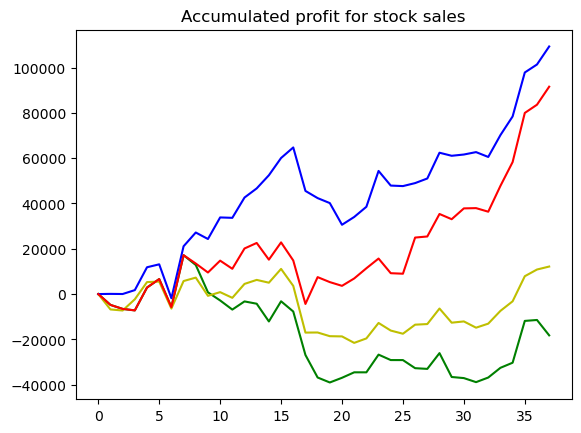

In [12]:
# Accumulated sum of profit per sell
plt.figure()
for each_bot in bots:
    plt.plot(each_bot.report_accumulated_profit(), color=colors[bots.index(each_bot)])
plt.title('Accumulated profit for stock sales')
plt.show()

### For a number of iterations, keep track of profit / loss, display as violin plot
normalize to total revenue

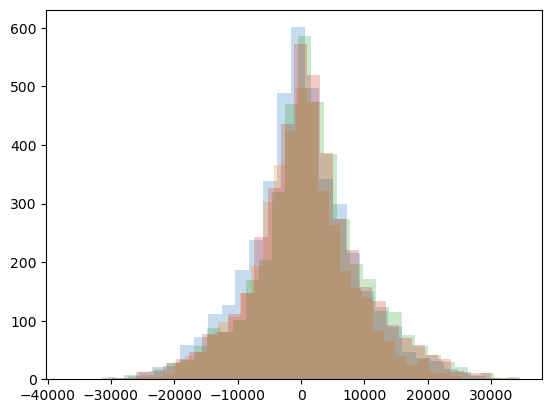

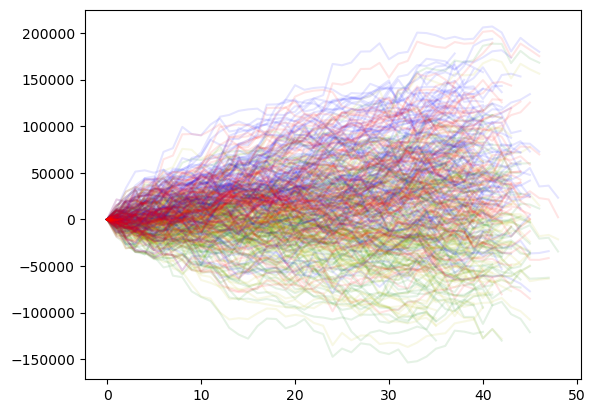

In [13]:
num_iterations = 100  # a runtime for 100 iterations: 42.8s
total_revenues_by_iteration = []
profit_per_bot_per_iteration = [[] for b in range(4)]
accumulated_profits_per_bot_per_iteration = [[] for b in range(4)]
class DataPoint:
    def __init__(self, total_revenue, bots_profit: list[float]) -> None:
        self.total_revenue = total_revenue
        self.bots_profit = bots_profit
        self.sort_by_index = 2
    def __lt__(self, other):
        return self.bots_profit[self.sort_by_index] < other.bots_profit[self.sort_by_index]  # for sorting by index (could also sort by linear combination)
data_points = []
histogram_by_bots = [[] for bot in range(4)]
for iteration in range(num_iterations):
    #
    # Hypothesis: the more bots buy at first (build up portfolios with (maybe not a uniform distribution of prices ... )) the greater the differences in profit (normalized to total revenue? yea this second part is a tautology from the first)
    #  (for a fixed proportion of portfolio, of sales)
    testing_buy_sell_string = generate_buy_sell_lines_string(['AAPL', 'MSFT', 'TSLA', 'NVDA'], 100, 20, 200)[0]
    # 1 bot/firm per strategy
    testing_bot_sell = TradingBot(10000)
    testing_bot_random = TradingBot(10000)
    testing_bot_optimal_1 = TradingBot(10000)
    testing_bot_optimal_2 = TradingBot(10000)
    bots = [testing_bot_sell, testing_bot_random, testing_bot_optimal_1, testing_bot_optimal_2]
    # interpret string as buy and sell, for each selling behavior, append total profit to appropriate list
    string_to_trading_bot(testing_buy_sell_string, testing_bot_sell, 1)
    total_revenues_by_iteration.append(testing_bot_sell.report_revenue())
    profit_per_bot_per_iteration[0].append(testing_bot_sell.report_profit())
    string_to_trading_bot(testing_buy_sell_string, testing_bot_random, 2)
    profit_per_bot_per_iteration[1].append(testing_bot_random.report_profit())
    string_to_trading_bot(testing_buy_sell_string, testing_bot_optimal_1, 3)
    profit_per_bot_per_iteration[2].append(testing_bot_optimal_1.report_profit())
    string_to_trading_bot(testing_buy_sell_string, testing_bot_optimal_2, 4)
    profit_per_bot_per_iteration[3].append(testing_bot_optimal_2.report_profit())
    # get data before the next iteration
    for sell_i, random_i, optimal_1_i, optimal_2_i in zip(testing_bot_sell.profit_per_sell, testing_bot_random.profit_per_sell, testing_bot_optimal_1.profit_per_sell, testing_bot_optimal_2.profit_per_sell):
        data_points.append(DataPoint(testing_bot_sell.report_revenue(), [sell_i, random_i, optimal_1_i, optimal_2_i]))
        histogram_by_bots[0].append(sell_i)
        histogram_by_bots[1].append(random_i)
        histogram_by_bots[2].append(optimal_1_i)
        histogram_by_bots[3].append(optimal_2_i)
    for b_i, each_bot in zip(range(len(bots)), bots):
        accumulated_profits_per_bot_per_iteration[b_i].append(each_bot.report_accumulated_profit())
    # zip then sort: from https://stackoverflow.com/a/11601991
    #
    # add this to each iteration then merge them all? probably just sort them, it's small data
zipped_histogram = zip(histogram_by_bots[0], histogram_by_bots[1], histogram_by_bots[2], histogram_by_bots[3])
sorted_zipped_hist = sorted(zipped_histogram, key=lambda b: b[2])  # sort by Optimal 1  # https://www.geeksforgeeks.org/python-ways-to-sort-a-zipped-list-by-values/

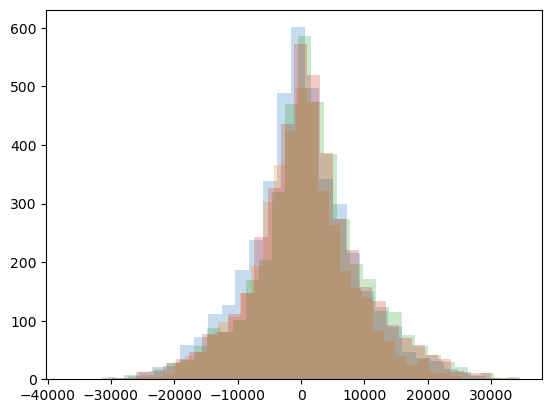

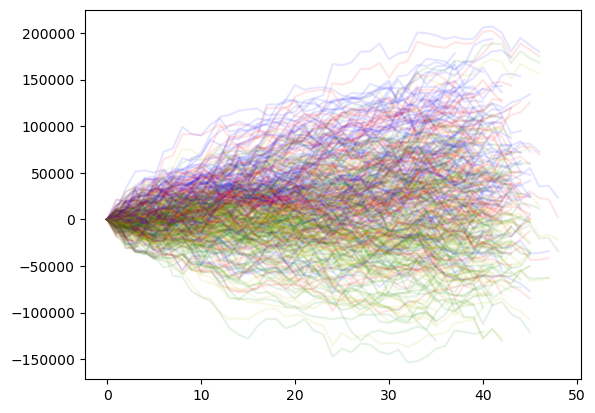

In [17]:
import random
# print()
# print(list(zipped_histogram))
# print()
# print(list(sorted_zipped_hist))
plt.figure()
for h_i in range(4):
    plt.hist([sorted_zipped_hist[b_i][h_i] for b_i in range(len(sorted_zipped_hist))], alpha=0.25, bins=32)
plt.show()
plt.figure()
for p_i in range(len(accumulated_profits_per_bot_per_iteration[0])):
    a_list = [0, 1, 2, 3]
    random.shuffle(a_list)
    for a_i in a_list:
        plt.plot(accumulated_profits_per_bot_per_iteration[a_i][p_i], color=colors[a_i], alpha=0.1)
plt.show()

In [18]:
zipped_histogram = zip(histogram_by_bots[0], histogram_by_bots[1], histogram_by_bots[2], histogram_by_bots[3])
zip_hist_2 = copy.deepcopy(zipped_histogram)
sorted_zipped_hist = sorted(zipped_histogram, key=lambda b: b[2])  # sort by Optimal 1  # https://www.geeksforgeeks.org/python-ways-to-sort-a-zipped-list-by-values/
# print()
# print(list(zipped_histogram))
# print()
# print(list(sorted_zipped_hist))
# plt.figure()
# for h_i in range(4):
#     plt.hist(histogram_by_bots[h_i], alpha=0.25, bins=200)
# plt.show()
# plt.figure()
# for z_i in range(3):
#     plt.scatter([s_i for s_i in range(len(list(sorted_zipped_hist)))], [list(sorted_zipped_hist)[z_j][z_i] for z_j in range(len(list(sorted_zipped_hist)))], alpha=0.1)  # TODO same colors as below
# plt.title("Optimal 1 in green")
# plt.show()
# sorted_zip_hist_2 = sorted(zip_hist_2, key=lambda b: b[3])
# plt.figure()
# for z_i in [0, 1, 3]:
#     plt.scatter([s_i for s_i in range(len(list(sorted_zip_hist_2)))], [list(sorted_zip_hist_2)[z_j][z_i] for z_j in range(len(list(sorted_zip_hist_2)))], alpha=0.1)  # TODO same colors as below
# plt.title("Optimal 2 in green")
# plt.show()

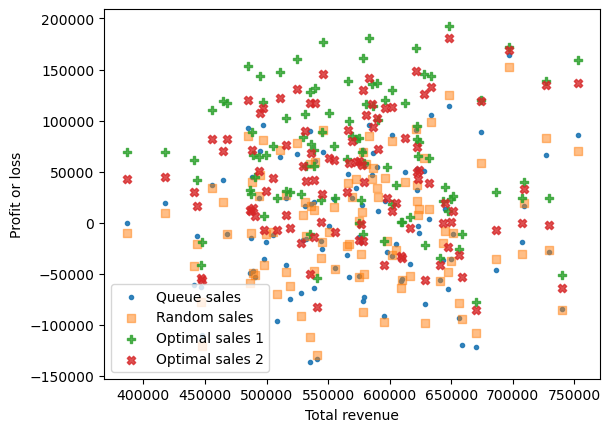

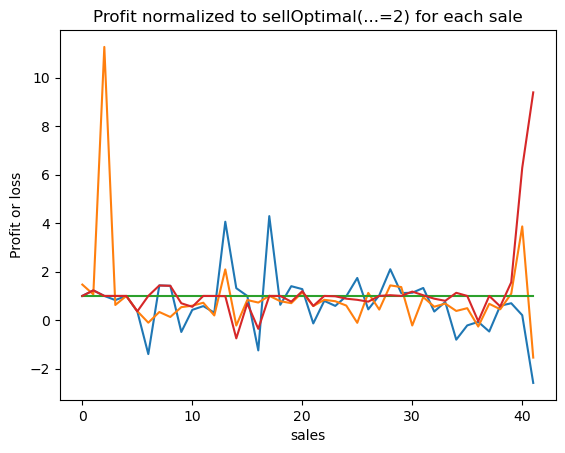

In [22]:
import random
# Violinplot of profit per bot per string
# positions = [0, 1, 2, 3]
# violin_fig = plt.figure()
# plt.violinplot(profit_per_bot_per_iteration, positions)
# plt.xticks(positions)
# plt.xlabels(['sell', 'sellRandom', 'sellOptimal(1)', 'sellOptimal(2)'])
# plt.show()  # TODO Get violinplot working with labels
# Scatterplot of revenue (x) and profit (y)
plt.figure()
plt.scatter(total_revenues_by_iteration, profit_per_bot_per_iteration[0], label='Queue sales', marker='.', alpha=0.9)
plt.scatter(total_revenues_by_iteration, profit_per_bot_per_iteration[1], label='Random sales', marker='s', alpha=0.5)
plt.scatter(total_revenues_by_iteration, profit_per_bot_per_iteration[2], label='Optimal sales 1', marker='P', alpha=0.8)
plt.scatter(total_revenues_by_iteration, profit_per_bot_per_iteration[3], label='Optimal sales 2', marker='X', alpha=0.8)
plt.ylabel('Profit or loss')
plt.xlabel('Total revenue')
plt.legend()
plt.show()
# profit over time
bots = [testing_bot_sell, testing_bot_random, testing_bot_optimal_1, testing_bot_optimal_2]
plt.figure()
for each_bot in bots:
    # normalized_profit = [each_bot.profit_per_sell[p_i] / each_bot.report_revenue() for p_i in range(len(each_bot.profit_per_sell))]
    normalized_profit = [each_bot.profit_per_sell[p_i] / bots[2].profit_per_sell[p_i] for p_i in range(len(each_bot.profit_per_sell))]
    plt.plot(normalized_profit, label=str(each_bot))
plt.ylabel('Profit or loss')
plt.xlabel('sales')
plt.title('Profit normalized to sellOptimal(...=2) for each sale')
plt.show()
# sort data by Optimal sales 1
# bots = [testing_bot_sell, testing_bot_random, testing_bot_optimal_1, testing_bot_optimal_2]
# scatter_x = [x_i for x_i in range(len(testing_bot_sell.profit_per_sell))]
# normalized_profit_per_bot_per_string = [[] for n in range(4)]
# for n_i in range(len(normalized_profit_per_bot_per_string)):
#     for x_j in scatter_x:
#         normalized_profit_per_bot_per_string[n_i].append(bots[n_i].report_profit() / total_revenues_by_iteration[x_j])
# class DataPoint:
#     def __init__(self, total_revenue, bots_profit: list[float]) -> None:
#         self.total_revenue = total_revenue
#         self.bots_profit = bots_profit
#     def __lt__(self, other):
#         return self.bots_profit[2] < other.bots_profit[2]
# data_points = []
# counter = 0
# counter1 = 0
# for x_j in scatter_x:
#     counter1 += 1
#     d = DataPoint(total_revenues_by_iteration[x_j], [profit_per_bot_per_iteration[b_i][x_j] for b_i in range(len(bots))]) 
#     if len(data_points) == 0:
#         data_points.append(d)
#         counter += 1
#     else:
#         if d.bots_profit[2] >= data_points[-1].bots_profit[2]:
#             data_points.append(d)
#             counter += 1
#         elif d < data_points[0]:
#             data_points.insert(0, d)
#             counter += 1
#         else:
#             for d_i in range(len(data_points) - 1):
#                 counter += 1
#                 if d.bots_profit[2] >= data_points[-1].bots_profit[2] and d < data_points[d_i + 1]:
#                     data_points.insert(d_i + 1, d)
#                     # counter += 1
# print(counter)
# print(counter1)
# print(len(data_points))
# a = ["tim", "bob", "anna", "steve", "john","aaaaa","zzza"]
# a = sorted(a, key = lambda x:(x[-1],len(x),x))
# print(a) ### from: https://stackoverflow.com/a/71327678
# data_points.sort()  # sort by Optimal sales 1
# random.shuffle(data_points)
# plt.figure()
# plt.scatter([each_data_point.total_revenue for each_data_point in data_points], [each_data_point.bots_profit[0] for each_data_point in data_points], label='Queue sales', marker='.', alpha=0.9)
# plt.scatter([each_data_point.total_revenue for each_data_point in data_points], [each_data_point.bots_profit[1] for each_data_point in data_points], label='Random sales', marker='s', alpha=0.5)
# plt.scatter([each_data_point.total_revenue for each_data_point in data_points], [each_data_point.bots_profit[2] for each_data_point in data_points], label='Optimal sales 1', marker='P', alpha=0.8)
# plt.scatter([each_data_point.total_revenue for each_data_point in data_points], [each_data_point.bots_profit[3] for each_data_point in data_points], label='Optimal sales 2', marker='X', alpha=0.8)
# plt.ylabel('Profit or loss')
# plt.xlabel('total revenue')
# plt.title('Sorted by Optimal sales 1')
# plt.show()  ### can use zip


In [20]:
print(testing_bot_sell)
print(testing_bot_optimal_1.stock_ledger.equals(testing_bot_optimal_1.stock_ledger))  # TODO Get equals working (these should be equal)
#
testing_bot_sell.stock_ledger.display_ledger()
testing_bot_random.stock_ledger.display_ledger()
testing_bot_optimal_1.stock_ledger.display_ledger()
testing_bot_optimal_2.stock_ledger.display_ledger()
#
testing_bot_sell.stock_ledger.display_total_shares()
testing_bot_random.stock_ledger.display_total_shares()
testing_bot_optimal_1.stock_ledger.display_total_shares()
testing_bot_optimal_2.stock_ledger.display_total_shares()

False
----  Stock Ledger  ----
NVDA: 149.87 (58 shares)   1.0 (98 shares)   52.62 (174 shares)   
AAPL: 11.0 (178 shares)   37.9 (181 shares)   
MSFT: 81.67 (7 shares)   164.5 (181 shares)   151.17 (82 shares)   54.18 (77 shares)   12.09 (80 shares)   181.77 (147 shares)   42.73 (104 shares)   
TSLA: 57.31 (8 shares)   95.3 (72 shares)   71.67 (99 shares)   
----  Stock Ledger  ----
NVDA: 1.0 (33 shares)   30.92 (39 shares)   127.01 (17 shares)   27.14 (1 shares)   102.06 (9 shares)   149.87 (57 shares)   52.62 (174 shares)   
AAPL: 11.0 (92 shares)   37.9 (78 shares)   107.04 (39 shares)   43.29 (14 shares)   72.06 (25 shares)   10.88 (11 shares)   2.46 (8 shares)   77.1 (3 shares)   195.16 (41 shares)   167.52 (48 shares)   
MSFT: 81.67 (79 shares)   164.5 (77 shares)   108.05 (3 shares)   13.06 (3 shares)   107.79 (1 shares)   119.17 (6 shares)   197.51 (2 shares)   33.3 (2 shares)   195.25 (2 shares)   34.24 (31 shares)   151.17 (64 shares)   54.18 (77 shares)   12.09 (80 shares)  

In [11]:
# Testing, profit should be $10
test_profit_bot_1 = TradingBot(100)
test_profit_bot_1.buy('AAPL', 1, 20)
# print(test_profit_bot_1.report_last_profit())
test_profit_bot_1.sell('AAPL', 1, 20)
# print(test_profit_bot_1.report_last_profit())  # OK Something is definitely not working. -> -18711.160000000003, -> -18731.160000000003, -> -18751.160000000003
print(test_profit_bot_1.stock_sales_list[-1])
print("StockSale.shares length: " + str(len(test_profit_bot_1.stock_sales_list[0].shares)))
# Testing, profit should be $10
test_profit_bot_1 = TradingBot(100)
test_profit_bot_1.buy('MSFT', 2, 10)
print(test_profit_bot_1.report_last_profit())
test_profit_bot_1.sell('MSFT', 2, 15)
print(test_profit_bot_1.report_last_profit())  # OK Something is definitely not working. -> -18711.160000000003, -> -18731.160000000003, -> -18751.160000000003
print(test_profit_bot_1.stock_sales_list[-1])
print("StockSale.shares length: " + str(len(test_profit_bot_1.stock_sales_list[0].shares)))  # increments by 1 (or more) for each ipynb run


---- Stock Sale: AAPL ----
Cost        Price
$20         $20
- - - - - Total - - - - -
$0
StockSale.shares length: 1
0
10
---- Stock Sale: MSFT ----
Cost        Price
$10         $15
$10         $15
- - - - - Total - - - - -
$10
StockSale.shares length: 2


In [12]:
# test: doesn't make a test_sale with between 400 and 500 items in test_sale.shares
test_sale = StockSale('AAPL', 10)
print(test_sale.shares)
test_sale.price = 0
# test_sale.shares = []
test_sale.add_sale(StockPurchase('AAPL', 10))
print(test_sale.shares)
test_sale.shares = []
print(test_sale.shares)

[]
[]


### Sorted profit per sale (cannot compare columns TODO make sales depend on operation costs (and take really rare/good market opportunities (still, sell cheapest first))):

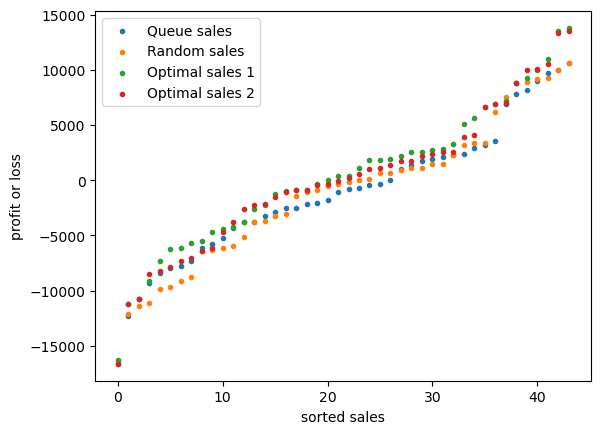

In [13]:
plot_x = range(len(testing_bot_sell.profit_per_sell))
plt.figure()
plt.scatter(plot_x, sorted(testing_bot_sell.profit_per_sell), label='Queue sales', marker='.')
plt.scatter(plot_x, sorted(testing_bot_random.profit_per_sell), label='Random sales', marker='.')
plt.scatter(plot_x, sorted(testing_bot_optimal_1.profit_per_sell), label='Optimal sales 1', marker='.')
plt.scatter(plot_x, sorted(testing_bot_optimal_2.profit_per_sell), label='Optimal sales 2', marker='.')
plt.legend()
plt.ylabel('profit or loss')
plt.xlabel('sorted sales')
plt.show()
# Pursuing the optimal strategy in step t may decrease the profit in step t + 1